**#For research question 1: How does a candidate's background, specifically in terms of race, veteran status, and LGBTQ identity, affect the outcome of Democratic primary elections?#**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
import requests
from pathlib import Path
import time

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.

    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded

    return: The pathlib.Path object representing the file.
    """

    ### BEGIN SOLUTION
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok = True)
    file_path = data_dir / Path(file)
    # If the file already exists and we want to force a download then
    # delete the file first so that the creation date is correct.
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
        last_modified_time = time.ctime(file_path.stat().st_mtime)
    else:
        last_modified_time = time.ctime(file_path.stat().st_mtime)
        print("Using cached version that was downloaded (UTC):", last_modified_time)
    return file_path

In [ ]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv'
df = pd.read_csv(url)

In [ ]:
dem18 = fetch_and_cache(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv",
    "dem18.csv",         # save as this file
    force=False)
print(dem18, "is", os.path.getsize(dem18) / 1e6, "MB")

Downloading... Done!
data/dem18.csv is 0.128163 MB


In [ ]:
#Data Overview#
df.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
init = df[["Race", "Veteran?", "LGBTQ?", "Primary Status","District","Justice Dems Endorsed?", "Sanders Endorsed?","Biden Endorsed?", "Primary %"]]

In [ ]:
init.head()

,Race,Veteran?,LGBTQ?,Primary Status,District,Justice Dems Endorsed?,Sanders Endorsed?,Biden Endorsed?,Primary %
0,Nonwhite,Yes,No,Lost,Governor of Alabama,NaN,NaN,NaN,3.42
1,White,No,Yes,Lost,Governor of Alabama,NaN,NaN,NaN,1.74
2,White,Yes,No,Lost,Governor of Alabama,NaN,NaN,NaN,3.27
3,Nonwhite,Yes,No,Lost,Governor of Alabama,NaN,NaN,NaN,8.00
4,White,No,No,Lost,Governor of Alabama,NaN,NaN,NaN,28.98


In [ ]:
init.rename(columns={"Primary %": "vote recieved"})

,Race,Veteran?,LGBTQ?,Primary Status,District,Justice Dems Endorsed?,Sanders Endorsed?,Biden Endorsed?,vote recieved
0,Nonwhite,Yes,No,Lost,Governor of Alabama,NaN,NaN,NaN,3.420000
1,White,No,Yes,Lost,Governor of Alabama,NaN,NaN,NaN,1.740000
2,White,Yes,No,Lost,Governor of Alabama,NaN,NaN,NaN,3.270000
3,Nonwhite,Yes,No,Lost,Governor of Alabama,NaN,NaN,NaN,8.000000
4,White,No,No,Lost,Governor of Alabama,NaN,NaN,NaN,28.980000
...,...,...,...,...,...,...,...,...,...
806,White,No,No,Advanced,U.S. House West Virginia District 2,NaN,NaN,NaN,62.570000
807,White,No,No,Lost,U.S. House West Virginia District 3,NaN,NaN,NaN,7.240000
808,White,No,No,Lost,U.S. House West Virginia District 3,NaN,NaN,NaN,15.960000
809,Nonwhite,Yes,No,Advanced,U.S. House West Virginia District 3,NaN,NaN,NaN,52.160000


In [ ]:
df[["Race", "Veteran?", "LGBTQ?", "Primary Status","District","Justice Dems Endorsed?", "Sanders Endorsed?","Biden Endorsed?"]].describe()

,Race,Veteran?,LGBTQ?,Primary Status,District,Justice Dems Endorsed?,Sanders Endorsed?,Biden Endorsed?
count,655,800,800,811,811,199,29,39
unique,2,2,2,2,242,2,2,2
top,White,No,No,Lost,U.S. House Ohio District 12,No,No,No
freq,452,677,763,546,13,149,20,29


In [ ]:
init = init.fillna(0)

In [ ]:
#init.describe()

In [ ]:
#We want to understand the specific background of the candidates, whether they won the primary or not.#
background0 = df[["Race", "Veteran?", "LGBTQ?", "Primary Status"]]
background0['Race'] = background0['Race'].map({'White':1,'Nonwhite':0})
background0['Veteran?']= background0['Veteran?'].map({'Yes':1 ,'No':0})
background0['LGBTQ?'] = background0['LGBTQ?'].map({'Yes':1 ,'No':0})
background0['Primary Status'] = background0['Primary Status'].map({'Lost':0, 'Advanced':1})
background0.describe()

<ipython-input-13-428dd5ffd00e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background0['Race'] = background0['Race'].map({'White':1,'Nonwhite':0})
<ipython-input-13-428dd5ffd00e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background0['Veteran?']= background0['Veteran?'].map({'Yes':1 ,'No':0})
<ipython-input-13-428dd5ffd00e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Race,Veteran?,LGBTQ?,Primary Status
count,655.000000,800.000000,800.000000,811.000000
mean,0.690076,0.153750,0.046250,0.326757
std,0.462815,0.360935,0.210157,0.469317
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
#We want to understand the specific background of the candidate who won the primary.#
background1 = df[["Race", "Veteran?", "LGBTQ?", "Primary Status"]].where(df["Primary Status"]=="Advanced")
background1['Race'] = background1['Race'].map({'White':1,'Nonwhite':0})
background1['Veteran?']= background1['Veteran?'].map({'Yes':1 ,'No':0})
background1['LGBTQ?'] = background1['LGBTQ?'].map({'Yes':1 ,'No':0})
background1['Primary Status'] = background1['Primary Status'].map({'Lost':0, 'Advanced':1})
background1.describe()

,Race,Veteran?,LGBTQ?,Primary Status
count,220.000000,265.000000,265.000000,265.0
mean,0.713636,0.143396,0.041509,1.0
std,0.453092,0.351140,0.199843,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,0.000000,1.0
75%,1.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.0


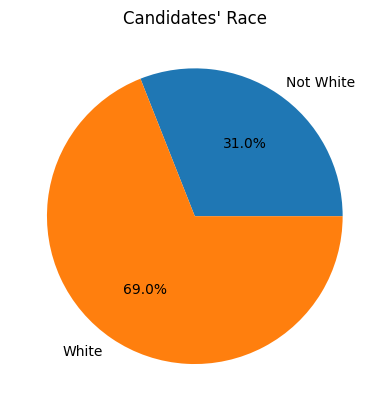

In [ ]:
#EDA#
#Visualization 1.1#
#The distribution of the races of candidates who won or did not win the primary.#
labels =  'Not White','White'
background0.groupby("Race").size().plot(kind = "pie", y = "Race", labels = labels, autopct='%1.1f%%')
plt.title("Candidates' Race")
plt.show()

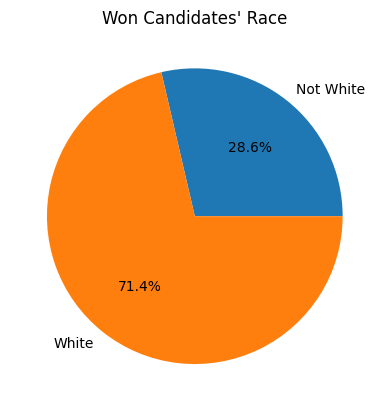

In [ ]:
#Visualization 1.2#
#The distribution of the races of candidates who won primary.#
labels =  'Not White','White'
background1.groupby("Race").size().plot(kind = "pie", y = "Race", labels = labels, autopct='%1.1f%%')
plt.title("Won Candidates' Race")
plt.show()

Race:  White Among all candidates: 0.3 Among the Advanced candidates: 0.28

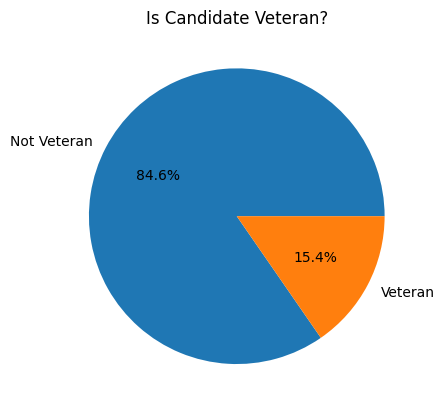

In [ ]:
#Visualization 2.1#
#The distribution of the veterans of candidates who won or did not win the primary.#
labels =  'Not Veteran','Veteran'
background0.groupby("Veteran?").size().plot(kind = "pie", y = "Veteran?", labels = labels, autopct='%1.1f%%')
plt.title("Is Candidate Veteran?")
plt.show()

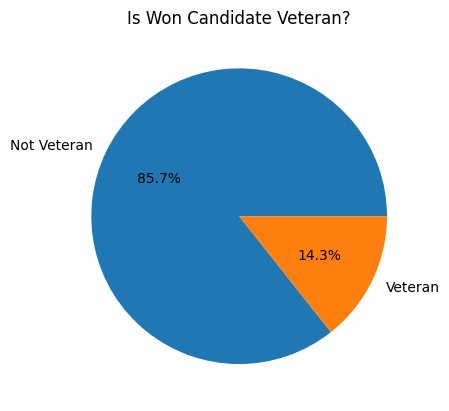

In [ ]:
#Visualization 2.2#
#The distribution of the veterans of candidates who won the primary.#
labels =  'Not Veteran','Veteran'
background1.groupby("Veteran?").size().plot(kind = "pie", y = "Veteran?", labels = labels, autopct='%1.1f%%')
plt.title("Is Won Candidate Veteran?")
plt.show()

Veteran?
NonVeteran Among all candidates: 0.84 Among the Advanced candidates: 0.85

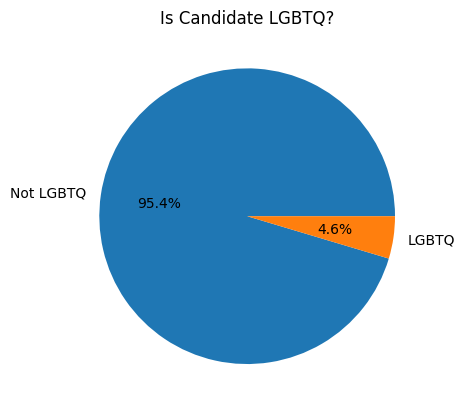

In [ ]:
#Visualization 3.1#
#The distribution of the LGBTQ of candidates who won or did not win the primary.#
labels = 'Not LGBTQ', 'LGBTQ'
background0.groupby("LGBTQ?").size().plot(kind = "pie", y = "LGBTQ?", labels = labels, autopct='%1.1f%%')
plt.title("Is Candidate LGBTQ?")
plt.show()

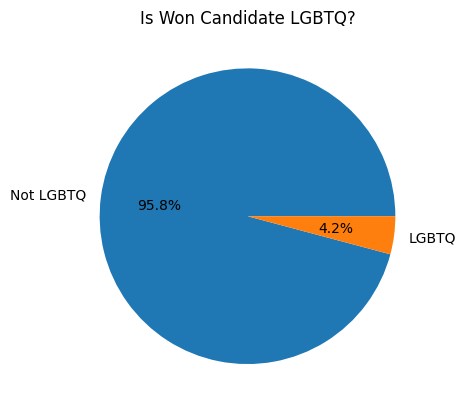

In [ ]:
#Visualization 3.2#
#The distribution of the LGBTQ of candidates who won the primary.#
labels = 'Not LGBTQ', 'LGBTQ'
background1.groupby("LGBTQ?").size().plot(kind = "pie", y = "LGBTQ?", labels = labels, autopct='%1.1f%%')
plt.title("Is Won Candidate LGBTQ?")
plt.show()

LGBTQ?: NonLGBTQ Among all candidates: 0.95375 Among the Advanced candidates:0.95849

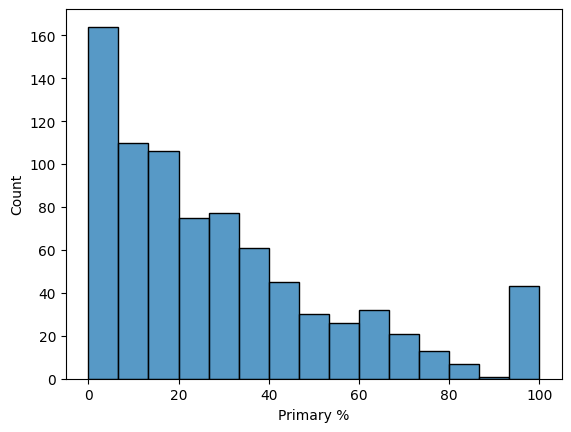

In [ ]:
#Visualization 4#
#We want to know the primary vote percentage of the candidates#
sns.histplot(data = init, x = 'Primary %');

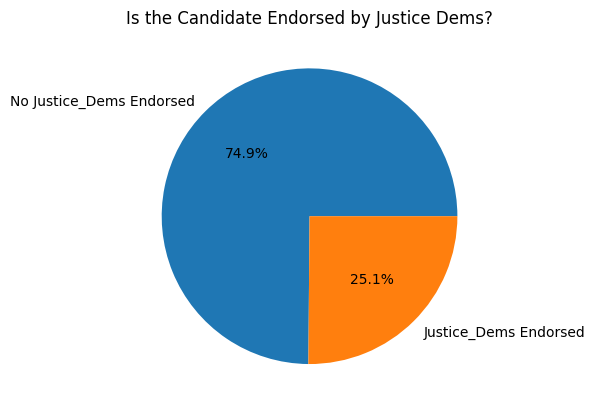

In [ ]:
#Visualization 5#
#We want to know if the candidate has the support of Justice Democrats before the primary.#
labels = 'No Justice_Dems Endorsed', 'Justice_Dems Endorsed'
Justice_Dems_Endorsed = init["Justice Dems Endorsed?"].map({'Yes':1 ,'No':0})
init.groupby(Justice_Dems_Endorsed).size().plot(kind = "pie", y = Justice_Dems_Endorsed, labels = labels, autopct='%1.1f%%')
plt.title("Is the Candidate Endorsed by Justice Dems?")
plt.show()

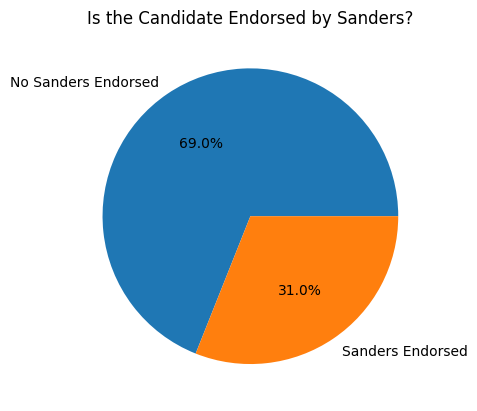

In [ ]:
#Visualization 6#
#We want to know if the candidate has the support of Bernie Sanders before the primary.#
labels = 'No Sanders Endorsed', 'Sanders Endorsed'
Sanders_Endorsed = init["Sanders Endorsed?"].map({'Yes':1 ,'No':0})
init.groupby(Sanders_Endorsed).size().plot(kind = "pie", y = Sanders_Endorsed, labels = labels, autopct='%1.1f%%')
plt.title("Is the Candidate Endorsed by Sanders?")
plt.show()

In [ ]:
init.groupby("District").size()

District
Governor of Alabama        6
Governor of Arkansas       2
Governor of California    12
Governor of Colorado       4
Governor of Georgia        2
                          ..
U.S. Senate Nebraska       4
U.S. Senate Nevada         6
U.S. Senate Tennessee      3
U.S. Senate Texas          3
U.S. Senate Utah           1
Length: 242, dtype: int64

Trends and relevance
1. For visulization 1-3: Among the specific backgrounds of the candidates we focused on, we found that white, non-Veteran, and non-LGBTQ groups were in the majority. But that percentage didn't change significantly among primary-victory candidates, perhaps suggesting that certain backgrounds don't give candidates a clear advantage. These **three** variables are the objects of our research as **categorical variables**. This visualization will give an intuitive answer to our research results, but we still need to eliminate the influence of some bias and confounding on the results through follow-up research.
2. For visulization 4: We looked at the distribution of primary votes. We found that the proportion of votes in the range of 50-90 percent is very small, the proportion of 0-20 percent is high, and the proportion of 100 percent is relatively high. As a **quantitative variable**, the vote rate in the primary election is not only related to the specific background we focus on, but may also affect the final primary election results, because some states need to conduct primary elections in the state before deciding whether to enter the general primary election . So "primary percent" may have an impact on our casual inference as a confounder variable.
3. For visulization 5: We also looked at the distribution of Justice Democrats endorsement. We found that about a quarter of the candidates could get the support of this party. We follow him because, based on their website descriptions and their political advocacy, the specific backgrounds of the candidates we research are likely to be their main considerations. So we visualized it by converting it into a **quantitative variable**. This variable is not only related to race, veteran and LGBTQ, but also affects the results of the primary election through publicity and sponsorship, so it may be used as a confounder variable to affect our final casual inference.
4. For visulization 6: We're also looking at whether candidates have the endorsement of Bernie Sanders ahead of the primary. We converted it into a **quantitative variable** for visualization. We found that a third of the candidates had his backing. Bernie Sanders' political views pay more attention to some disadvantaged and minority groups, so this is related to our treatments. At the same time, his approval and support will also have an impact on the results of the primary election. So this may be a confounder variable that will have an impact on our final casual inference.


In [ ]:
#For checkpoint 2#
# Convert background categories to binary variables
df['Race_Binary'] = np.where(df['Race'] == 'White', 0, 1)
df['Veteran_Binary'] = np.where(df['Veteran?'] == 'Yes', 1, 0)
df['LGBTQ_Binary'] = np.where(df['LGBTQ?'] == 'Yes', 1, 0)
df['Justice_Dems_Endorsed_Binary'] = np.where(df['Justice Dems Endorsed?'] == 'Yes', 1, 0)
df['Sanders_Endorsed_Binary'] = np.where(df['Sanders Endorsed?'] == 'Yes', 1, 0)
df['Biden_Endorsed_Binary'] = np.where(df['Biden Endorsed?'] == 'Yes', 1, 0)

# Create a binary outcome variable for winning or losing the primary
df['Primary_Outcome'] = np.where(df['Primary Status'] == 'Advanced', 1, 0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Filter only relevant columns
relevant_cols = ['Primary_Outcome', 'Race_Binary', 'Veteran_Binary', 'LGBTQ_Binary', 'Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']
df_filtered = df[relevant_cols]

# Drop rows with missing data
df_filtered = df_filtered.dropna()

# Split the data into input and output variables
X = df_filtered[['Race_Binary', 'Veteran_Binary', 'LGBTQ_Binary', 'Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']]
y = df_filtered['Primary_Outcome']

# Split the data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Get accuracy of the model
accuracy = log_reg.score(X_test, y_test)
print(f"Logistic Regression Model Accuracy: {accuracy:.2f}")

# Display the coefficients for each variable
coef = pd.DataFrame(log_reg.coef_, columns=X.columns, index=['Coefficient'])

# Style the DataFrame for better visualization
styled_coef = coef.style.format("{:.4f}", precision=4) \
    .set_table_attributes('style="font-family: Arial; border-collapse: collapse; border: 1px solid black;"') \
    .set_properties(**{'text-align': 'center', 'border': '1px solid black'}) \
    .set_properties(**{'background-color': '#F3EFEF'}, subset=pd.IndexSlice['Coefficient', :]) \
    .set_caption("Logistic Regression Model Coefficients") \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon')

styled_coef

Logistic Regression Model Accuracy: 0.68


,Race_Binary,Veteran_Binary,LGBTQ_Binary,Justice_Dems_Endorsed_Binary,Sanders_Endorsed_Binary,Biden_Endorsed_Binary
Coefficient,-0.2498,0.0534,0.2544,0.4238,0.6923,2.0538


**Methods:**
- Describe which variables correspond to treatment and outcome.

 **Treatment: Candidate's particular background, specifically Race (White, Nonwhite), Veteran status (Yes, No), and LGBTQ status (Yes, No).
Outcome: The election outcome for each Democratic primary candidate, likely measured as winning or losing the primary (binary outcome)**

– Describe which variables (if any) are confounders. If the unconfoundedness assumption holds, make a convincing argument for why.

**Confounders : endorsements.In this analysis, we assume that endorsements from Justice Democrats, Bernie Sanders, and Joe Biden are the primary confounders.For the unconfoundedness assumption to hold, we need to argue that the endorsement variables included in the model capture all relevant confounding factors. Endorsements are an important aspect of political campaigns and can influence voters' perceptions of a candidate, as well as provide financial and strategic support. Endorsements might be related to a candidate's background, as certain endorsers may be more likely to support candidates from specific racial, veteran, or LGBTQ backgrounds. At the same time, endorsements can directly impact a candidate's chances of winning the primary election.**

– What methods will you use to adjust for confounders?

**We used logistic regression to adjust for confounders. Specifically, we included the confounding variables 'Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', and 'Biden_Endorsed_Binary' as predictors in the logistic regression model along with the treatment variables 'Race_Binary', 'Veteran_Binary', and 'LGBTQ_Binary'.**

– Are there any colliders in the dataset? If so, what are they?

**There is no direct evidence of colliders in the provided dataset**

– Draw the causal DAG for your variables.
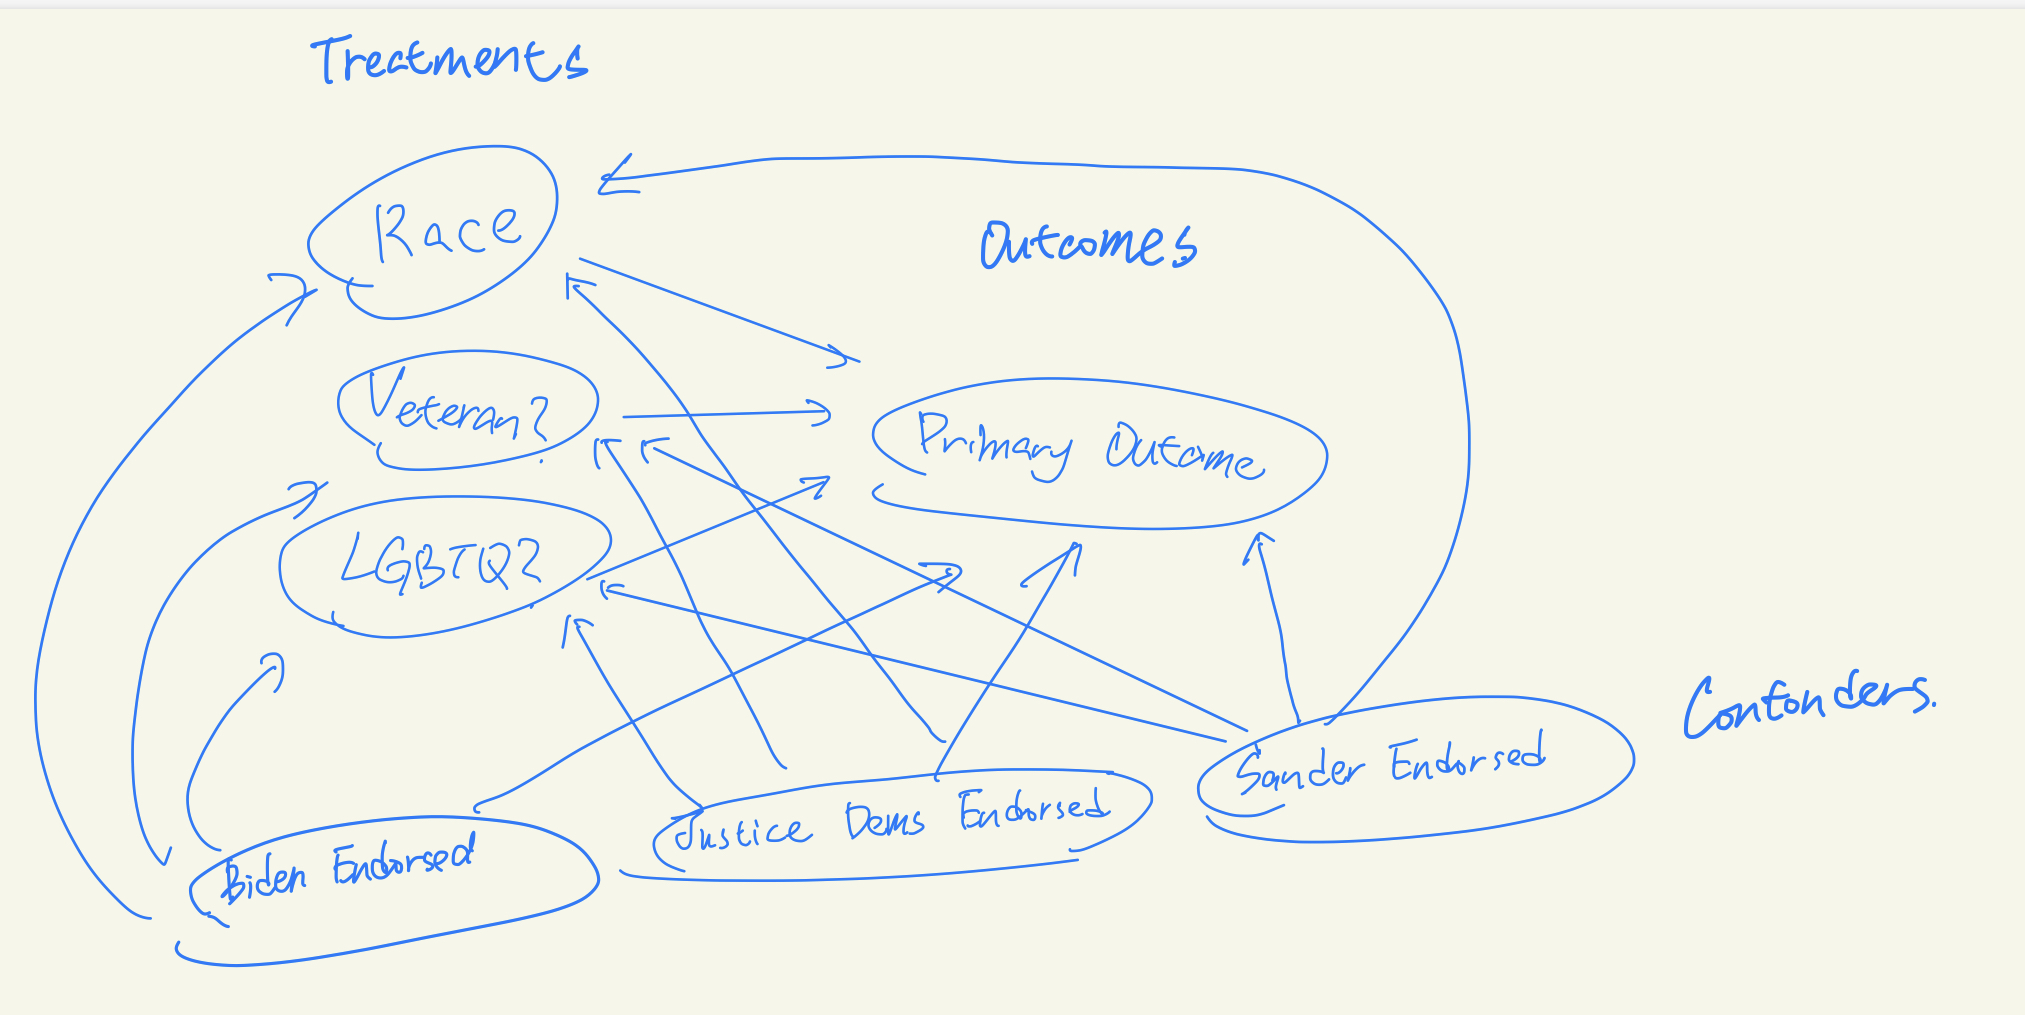

- Summarize and interpret your results, providing a clear statement about causality (or a
lack thereof) including any assumptions necessary. In addition to statistical significance,
discuss the magnitude of any effect you find.

 **Based on the logistic regression analysis, the results suggest that there are associations between a candidate's background (specifically race, veteran status, and LGBTQ identity) and the outcome of Democratic primary elections, after adjusting for potential confounding effects of endorsements from Justice Democrats, Bernie Sanders, and Joe Biden. The estimated coefficients for the treatment variables represent the effects of these variables on the primary outcome, adjusted for the potential confounding effects of the endorsement variables.**

 **However, it is essential to note that these results are based on observational data, and thus causality cannot be firmly established. While logistic regression adjusts for potential confounders, there may still be unmeasured confounding variables or potential biases that could influence the results. The magnitudes of the effects found in the analysis should be interpreted with caution. The coefficients can be used to understand the direction and strength of associations between the treatment variables and the primary outcome, but they do not necessarily imply a direct causal relationship. To make stronger causal claims, further studies, such as randomized controlled trials or natural experiments, would be needed to isolate the causal effects of a candidate's background on election outcomes.**


- Where possible, discuss the uncertainty in your estimate and/or the evidence against the
hypotheses you are investigating.

 **The analysis conducted using logistic regression provides us with estimated coefficients for the associations between the treatment variables (race, veteran status, and LGBTQ identity) and the primary election outcomes. However, there is inherent uncertainty in these estimates, as they are based on a sample of data rather than the entire population of interest. Confidence intervals could be calculated for each of the estimated coefficients to provide a range of plausible values for the true effect sizes, accounting for the uncertainty in the estimates.**

 **Moreover, the evidence against the hypotheses investigated is subject to several limitations. Firstly, there may be unmeasured confounding variables that were not included in the analysis, which could affect the associations between the treatment variables and the primary election outcomes. Secondly, the presence of any colliders, if not properly accounted for, could introduce bias in the estimates. Lastly, the observational nature of the data limits the strength of causal claims that can be made based on the results. The evidence against the hypotheses would be more compelling if it were based on experimental designs, such as randomized controlled trials, that can more effectively isolate the causal effects of the treatment variables on the election outcomes. In summary, while the analysis provides some evidence for associations between the treatment variables and primary election outcomes, the uncertainty in the estimates and the limitations of the study design should be considered when interpreting the results.**

In [ ]:
# Create candidate background variables if not available in the dataset
# (Replace 'race_column', 'veteran_column', 'lgbtq_column' with the actual column names)
df['is_minority'] = (df['Race'] != 'White').astype(int)
df['is_veteran'] = (df['Veteran?'] == 'Yes').astype(int)
df['is_lgbtq'] = (df['LGBTQ?'] == 'Yes').astype(int)

# Create a binary variable for election outcome (assuming 'Primary Status' column exists)
df['primary_win'] = (df['Primary Status'] == 'Advanced').astype(int)

# Calculate correlation coefficients
correlations = df[['is_minority', 'is_veteran', 'is_lgbtq', 'primary_win']].corr()

# Print the correlation coefficients
print(correlations)

             is_minority  is_veteran  is_lgbtq  primary_win
is_minority     1.000000   -0.003098 -0.016400    -0.049254
is_veteran     -0.003098    1.000000  0.006399    -0.016059
is_lgbtq       -0.016400    0.006399  1.000000    -0.013733
primary_win    -0.049254   -0.016059 -0.013733     1.000000


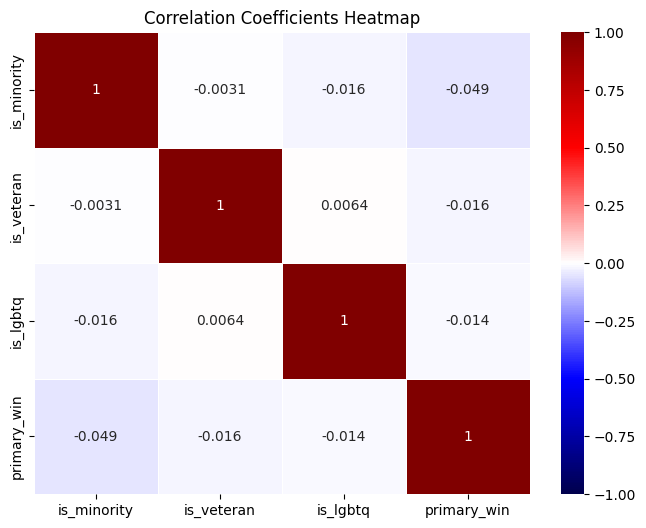

In [ ]:
# Create a heatmap of the correlation coefficients
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='seismic', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Coefficients Heatmap")
plt.show()

In [ ]:
# Create a DataFrame with the treatment variables, outcome variables, and confounders
variables = ['is_minority', 'is_veteran', 'is_lgbtq', 'primary_win',
             'Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']

matching = df[variables]

# Estimate propensity scores using logistic regression
logistic = LogisticRegression()
treatment_race = matching['is_minority']  # Change this to 'is_veteran' or 'is_lgbtq' for other treatments

confounders = df[['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']]
logistic.fit(confounders, treatment_race)
propensity_scores = logistic.predict_proba(confounders)[:, 1]
# Match treated and untreated units using nearest neighbors matching
#Race
treated_indices_race = np.where(treatment_race == 1)[0]
untreated_indices_race = np.where(treatment_race == 0)[0]
nearest_neighbors = NearestNeighbors(n_neighbors=1)
nearest_neighbors.fit(propensity_scores[untreated_indices_race].reshape(-1, 1))
_, matched_indices = nearest_neighbors.kneighbors(propensity_scores[treated_indices_race].reshape(-1, 1))
matched_indices = untreated_indices_race[matched_indices.flatten()]
# Create matched datasets for treated and untreated units
treated_data_race = df.loc[treated_indices_race]
untreated_data = df.loc[matched_indices]
# Estimate treatment effects using the matched data
treatment_effect_primary_race = treated_data_race['primary_win'].mean() - untreated_data['primary_win'].mean()

print("Average Treatment Effect of Race on Primary Win:", treatment_effect_primary_race)

Average Treatment Effect of Race on Primary Win: 0.21727019498607242


In [ ]:
# Estimate propensity scores using logistic regression
logistic = LogisticRegression()
treatment_veteran = matching['is_veteran']  # Change this to 'is_veteran' or 'is_lgbtq' for other treatments

confounders = df[['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']]
logistic.fit(confounders, treatment_veteran)
propensity_scores = logistic.predict_proba(confounders)[:, 1]
# Match treated and untreated units using nearest neighbors matching
#Race
treated_indices_veteran = np.where(treatment_veteran == 1)[0]
untreated_indices_veteran= np.where(treatment_veteran == 0)[0]
nearest_neighbors = NearestNeighbors(n_neighbors=1)
nearest_neighbors.fit(propensity_scores[untreated_indices_veteran].reshape(-1, 1))
_, matched_indices = nearest_neighbors.kneighbors(propensity_scores[treated_indices_veteran].reshape(-1, 1))
matched_indices = untreated_indices_veteran[matched_indices.flatten()]
# Create matched datasets for treated and untreated units
treated_data_veteran = df.loc[treated_indices_veteran]
untreated_data = df.loc[matched_indices]
# Estimate treatment effects using the matched data
treatment_effect_primary_veteran = treated_data_veteran['primary_win'].mean() - untreated_data['primary_win'].mean()

print("Average Treatment Effect of Veteran Status on Primary Win:", treatment_effect_primary_veteran)

Average Treatment Effect of Veteran Status on Primary Win: 0.2845528455284553


In [ ]:
# Estimate propensity scores using logistic regression
logistic = LogisticRegression()
treatment_lgbtq = matching['is_lgbtq']  # Change this to 'is_veteran' or 'is_lgbtq' for other treatments

confounders = df[['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']]
logistic.fit(confounders, treatment_lgbtq)
propensity_scores = logistic.predict_proba(confounders)[:, 1]
# Match treated and untreated units using nearest neighbors matching
#Race
treated_indices_lgbtq = np.where(treatment_lgbtq == 1)[0]
untreated_indices_lgbtq= np.where(treatment_lgbtq == 0)[0]
nearest_neighbors = NearestNeighbors(n_neighbors=1)
nearest_neighbors.fit(propensity_scores[untreated_indices_lgbtq].reshape(-1, 1))
_, matched_indices = nearest_neighbors.kneighbors(propensity_scores[treated_indices_lgbtq].reshape(-1, 1))
matched_indices = untreated_indices_lgbtq[matched_indices.flatten()]
# Create matched datasets for treated and untreated units
treated_data_lgbtq = df.loc[treated_indices_lgbtq]
untreated_data = df.loc[matched_indices]
# Estimate treatment effects using the matched data
treatment_effect_primary_lgbtq = treated_data_lgbtq['primary_win'].mean() - untreated_data['primary_win'].mean()

print("Average Treatment Effect of LGBTQ on Primary Win:", treatment_effect_primary_lgbtq)

Average Treatment Effect of LGBTQ on Primary Win: 0.21621621621621623


Text(0.5, 0.98, 'Propensity score distribution before and after matching - LGBTQ')

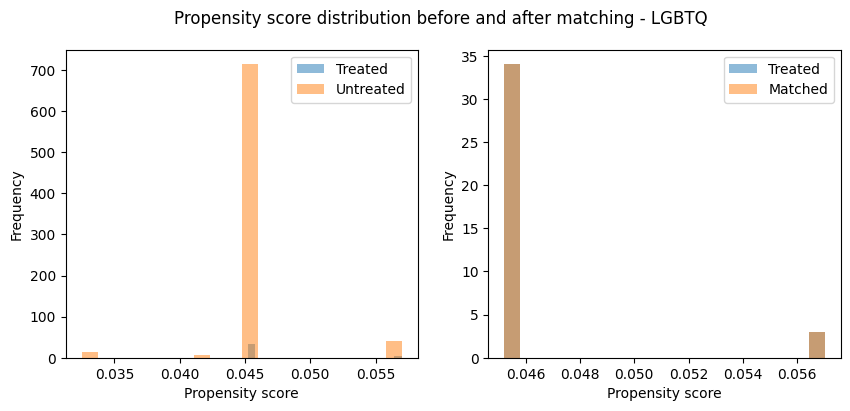

In [ ]:
# Plot the distribution of propensity scores before and after matching
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.hist(propensity_scores[treatment_lgbtq == 1], bins=20, label='Treated', alpha=.5)
ax1.hist(propensity_scores[treatment_lgbtq == 0], bins=20, label='Untreated', alpha=.5)
ax1.set_xlabel('Propensity score')
ax1.set_ylabel('Frequency')
ax1.legend()
ax2.hist(propensity_scores[treated_indices_lgbtq], bins=20, label='Treated', alpha=.5)
ax2.hist(propensity_scores[matched_indices], bins=20, label='Matched', alpha=.5)
ax2.set_xlabel('Propensity score')
ax2.set_ylabel('Frequency')
ax2.legend()
fig.suptitle('Propensity score distribution before and after matching - LGBTQ')

Text(0.5, 0.98, 'Propensity score distribution before and after matching - Veteran')

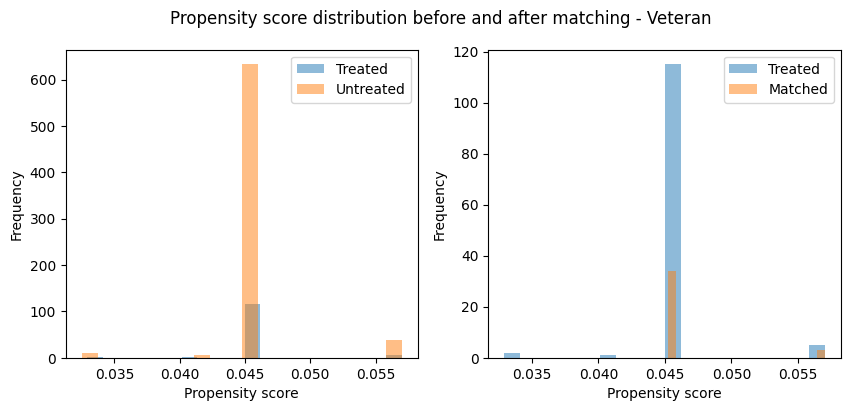

In [ ]:
# Plot the distribution of propensity scores before and after matching
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.hist(propensity_scores[treatment_veteran == 1], bins=20, label='Treated', alpha=.5)
ax1.hist(propensity_scores[treatment_veteran == 0], bins=20, label='Untreated', alpha=.5)
ax1.set_xlabel('Propensity score')
ax1.set_ylabel('Frequency')
ax1.legend()
ax2.hist(propensity_scores[treated_indices_veteran], bins=20, label='Treated', alpha=.5)
ax2.hist(propensity_scores[matched_indices], bins=20, label='Matched', alpha=.5)
ax2.set_xlabel('Propensity score')
ax2.set_ylabel('Frequency')
ax2.legend()
fig.suptitle('Propensity score distribution before and after matching - Veteran')

Text(0.5, 0.98, 'Propensity score distribution before and after matching - Race')

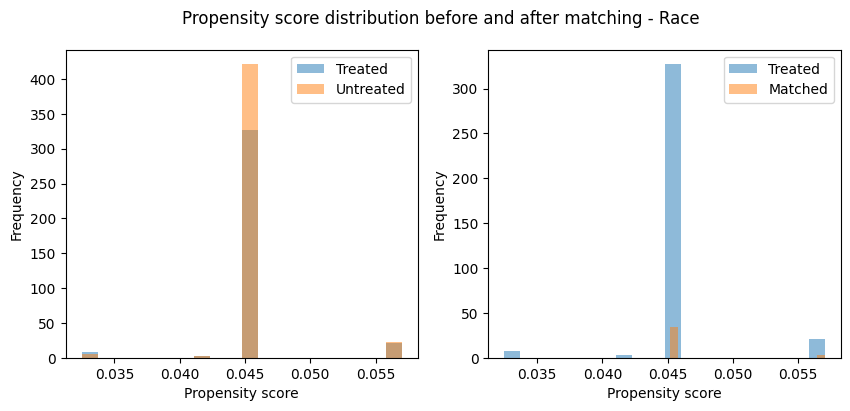

In [ ]:
# Plot the distribution of propensity scores before and after matching
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.hist(propensity_scores[treatment_race == 1], bins=20, label='Treated', alpha=.5)
ax1.hist(propensity_scores[treatment_race == 0], bins=20, label='Untreated', alpha=.5)
ax1.set_xlabel('Propensity score')
ax1.set_ylabel('Frequency')
ax1.legend()
ax2.hist(propensity_scores[treated_indices_race], bins=20, label='Treated', alpha=.5)
ax2.hist(propensity_scores[matched_indices], bins=20, label='Matched', alpha=.5)
ax2.set_xlabel('Propensity score')
ax2.set_ylabel('Frequency')
ax2.legend()
fig.suptitle('Propensity score distribution before and after matching - Race')


Text(0.5, 0.98, 'Covariate balance before and after matching')

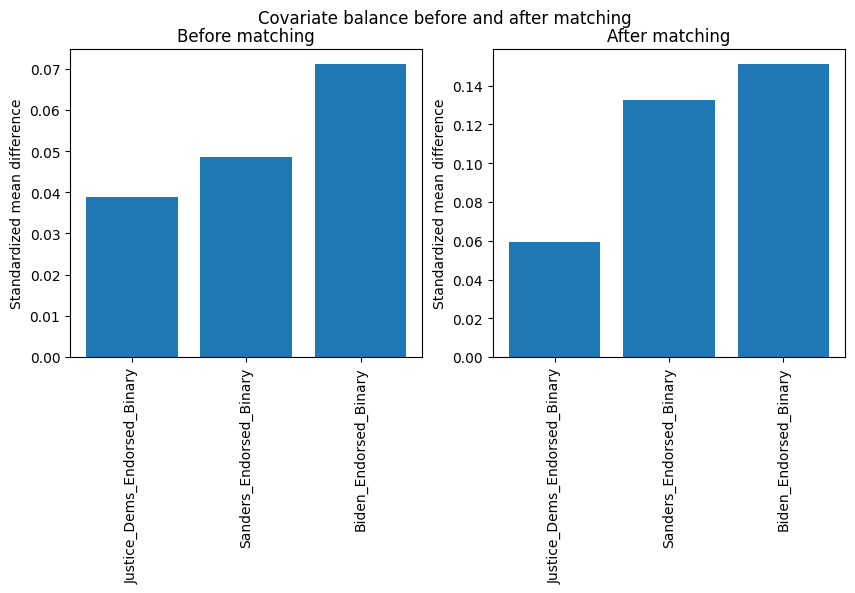

In [ ]:
# Plot the standardized mean differences before and after matching
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.bar(range(len(['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary'])),
        abs(df[treatment_race == 1][['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']].mean() -
            df[treatment_race == 0][['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']].mean()) /
        df[['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']].std())
ax1.set_xticks(range(len(['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary'])))
ax1.set_xticklabels(['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary'], rotation=90)
ax1.set_ylabel('Standardized mean difference')
ax1.set_title('Before matching')
ax2.bar(range(len(['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary'])),
        abs(treated_data_race[['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']].mean() -
            untreated_data[['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']].mean()) /
        df[['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary']].std())
ax2.set_xticks(range(len(['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary'])))
ax2.set_xticklabels(['Justice_Dems_Endorsed_Binary', 'Sanders_Endorsed_Binary', 'Biden_Endorsed_Binary'], rotation=90)
ax2.set_ylabel('Standardized mean difference')
ax2.set_title('After matching')
fig.suptitle('Covariate balance before and after matching')

# **Below are for Research Question 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

 **0. Import Datasets**

The dataset we chose to use for this research questions is the Candiate Summary from FEC, which contains the general financial information of each candiate in the year 2018, such as contributions, disimbursements and loans. The reason why we chose the year 2018 is for consistency concern with the other research question.

In [ ]:
candidate18 = pd.read_csv('candidate_summary_2018.csv')

In [ ]:
candidate18['Cand_Party_Affiliation'].unique()

array(['LIB', 'REP', 'GRE', 'DEM', 'IND', 'NNE', 'NPA', 'OTH', 'UN',
       'UNK', 'WTP', 'DFL', 'NON', 'NOP', 'ICD', 'IAP', 'W', 'MGP', 'N',
       'RE', 'LMN', 'GOP', 'UNA', 'REF', 'IDP', 'CON', 'AIP', 'WF', 'AMP',
       'POP', '02', 'CRV', 'VET', 'DIS', 'MTP', 'UNI', 'REC', 'SEP',
       'NPY', 'UST', nan], dtype=object)

**1. Data Preprossessing**


In [ ]:
candidate18 = candidate18.mask((candidate18 - candidate18.mean()).abs() > 3 * candidate18.std())
candidate18.fillna(candidate18.mean(), inplace=True)
candidate18 = candidate18.drop(columns = 'Link_Image', axis = 1)

<ipython-input-22-1160db0c75bf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  candidate18 = candidate18.mask((candidate18 - candidate18.mean()).abs() > 3 * candidate18.std())
<ipython-input-22-1160db0c75bf>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  candidate18 = candidate18.mask((candidate18 - candidate18.mean()).abs() > 3 * candidate18.std())
<ipython-input-22-1160db0c75bf>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, righ

 **2. EDA**


In [ ]:
candidate18.columns

Index(['Cand_Name', 'Cand_Id', 'Cand_Office', 'Cand_Office_St',
       'Cand_Office_Dist', 'Cand_Party_Affiliation',
       'Cand_Incumbent_Challenger_Open_Seat', 'Total_Receipt',
       'Total_Disbursement', 'Cash_On_Hand_COP', 'Debt_Owed_By_Committee',
       'Coverage_End_Date', 'Cand_Street_1', 'Cand_Street_2', 'Cand_City',
       'Cand_State', 'Cand_Zip', 'Individual_Itemized_Contribution',
       'Individual_Unitemized_Contribution', 'Individual_Contribution',
       'Other_Committee_Contribution', 'Party_Committee_Contribution',
       'Cand_Contribution', 'Total_Contribution',
       'Transfer_From_Other_Auth_Committee', 'Cand_Loan', 'Other_Loan',
       'Total_Loan', 'Offsets_To_Operating_Expenditure',
       'Offsets_To_Fundraising', 'Offsets_To_Leagal_Accounting',
       'Other_Receipts', 'Operating_Expenditure',
       'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement',
       'Transfer_To_Other_Auth_Committee', 'Cand_Loan_Repayment',
       'Other_Loan_Repa

Since there are many overlapping features, we selected a few from them to perform Exploratory Data Analysis, they are as follows:

1. Cand_Party_Affiliation
2. Total_Disbursement
3. Total_Contribution
4. Total_Loan
5. Total_Loan_Repayment
6. Total_Contribution_Refund
7. Net_Operating_Expenditure
8. Cash_On_Hand_BOP
9. Cand_Office_St

Most of those are prefixed "total" because we want to tell a genreal trend from the dataset.

In [ ]:
finstatus18 = candidate18[['Cand_Party_Affiliation', 'Cand_Office_St', 'Total_Disbursement', 'Total_Contribution', 'Total_Loan', 'Total_Loan_Repayment', 'Total_Contribution_Refund', 'Net_Operating_Expenditure', 'Cash_On_Hand_BOP']]

Text(0, 0.5, 'Count')

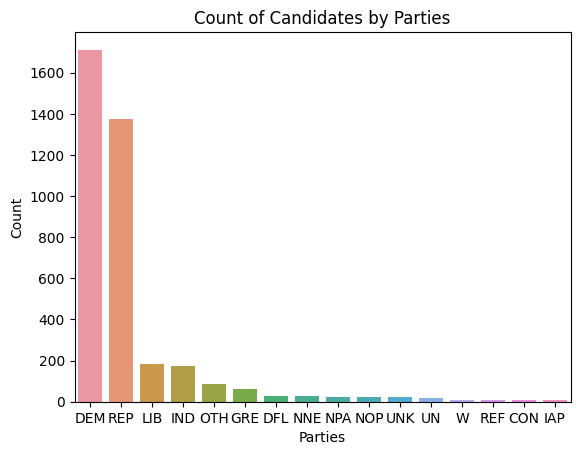

In [ ]:
counts = finstatus18['Cand_Party_Affiliation'].value_counts()
counts = counts[counts >= 5]
sns.barplot(x = counts.index, y = counts.values)
plt.title('Count of Candidates by Parties')
plt.xlabel('Parties')
plt.ylabel('Count')

From this plot we can see that candidates from Republicans and Democrast have taken up most of the population, while some other minor parties in total take up less than $1/3$ of the population

Text(0.5, 0, 'Count')

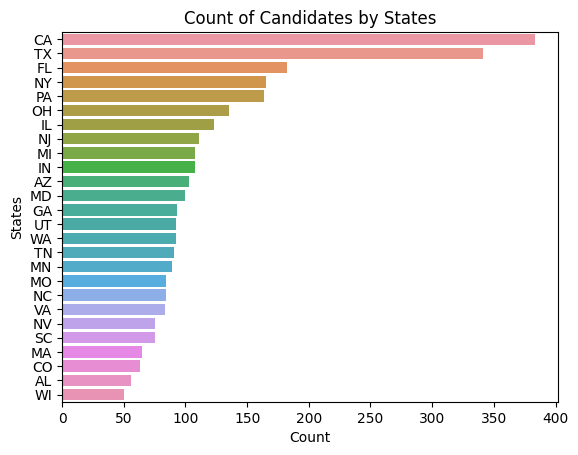

In [ ]:
counts = finstatus18['Cand_Office_St'].value_counts()
counts = counts[counts >= 50]
sns.barplot(y = counts.index, x = counts.values)
plt.title('Count of Candidates by States')
plt.ylabel('States')
plt.xlabel('Count')

In [ ]:
grouped = finstatus18.groupby('Cand_Party_Affiliation').mean().reset_index()

<ipython-input-27-53dcf47fc6b2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = finstatus18.groupby('Cand_Party_Affiliation').mean().reset_index()


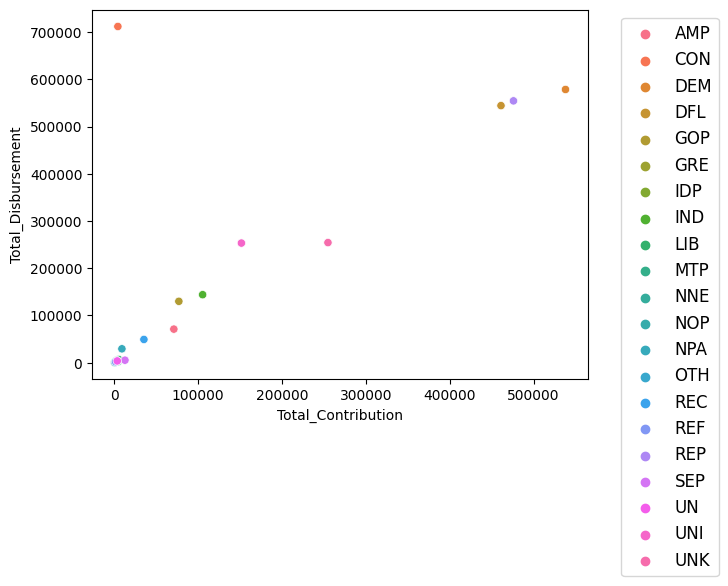

In [ ]:
sns.scatterplot(x = "Total_Contribution", y = "Total_Disbursement", data = grouped[grouped['Total_Contribution'] > 0], hue = "Cand_Party_Affiliation")
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

Text(0.5, 1.0, 'If Challenger')

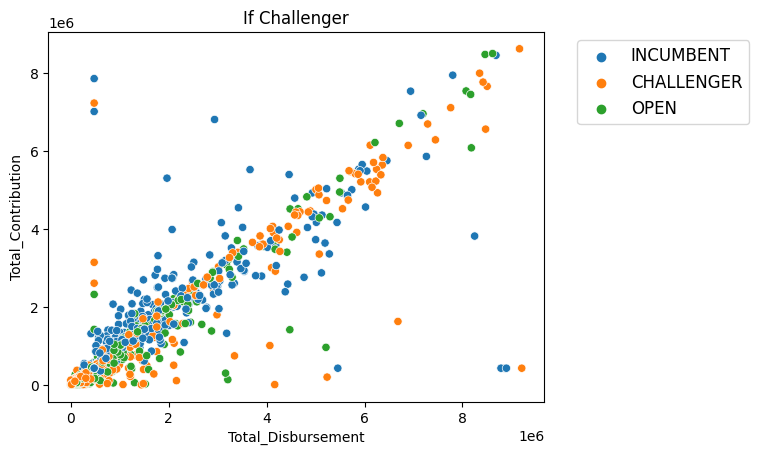

In [ ]:
sns.scatterplot(y = "Total_Contribution", x = "Total_Disbursement", data = candidate18[candidate18['Total_Contribution'] > 5], hue = 'Cand_Incumbent_Challenger_Open_Seat')
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('If Challenger')


**3. GLM**


In [ ]:
candidate18['third_party'] = (~candidate18['Cand_Party_Affiliation'].isin(['DEM', 'REP'])).astype(int)
candidate18['dem'] = (candidate18['Cand_Party_Affiliation'] == 'DEM').astype(int)
candidate18['rep'] = (candidate18['Cand_Party_Affiliation'] == 'REP').astype(int)
candidate18['challenger'] = (candidate18['Cand_Incumbent_Challenger_Open_Seat'] == 'CHALLENGER').astype(int)
candidate18.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,Cash_On_Hand_COP,...,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date,third_party,dem,rep,challenger
0,"ASHBY, KEN",H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,NaN,1,0,0,1
1,"ECKHART, DON ELIJAH",S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,NaN,0,0,1,1
2,"ZIESING, MICHAEL VINCENT",S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,NaN,1,0,0,1
3,"SIRES, ALBIO",H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,158849.09,...,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017,0,1,0,0
4,"SMITH, DOUGLAS MARK MR. JR.",H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,0.00,...,0.00,0.00,3873.60,3873.60,0.0,01/01/2017,1,0,0,1


In [ ]:
electoral_college = pd.read_csv('Electoral_College.csv')
candidate18_ec = candidate18.join(electoral_college.set_index('Abb_State'), on='Cand_Office_St')
candidate18_ec['Electoral_College_Votes'] = candidate18_ec['Electoral_College_Votes'].fillna(0)
candidate18_ec.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,Cash_On_Hand_COP,...,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date,third_party,dem,rep,challenger,Full_State,Electoral_College_Votes
0,"ASHBY, KEN",H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,0.00,...,0.00,0.00,0.0,NaN,1,0,0,1,Texas,38.0
1,"ECKHART, DON ELIJAH",S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,0.00,...,0.00,0.00,0.0,NaN,0,0,1,1,Ohio,18.0
2,"ZIESING, MICHAEL VINCENT",S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,0.00,...,0.00,0.00,0.0,NaN,1,0,0,1,California,55.0
3,"SIRES, ALBIO",H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,158849.09,...,437542.51,290287.08,0.0,01/01/2017,0,1,0,0,New Jersey,14.0
4,"SMITH, DOUGLAS MARK MR. JR.",H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,0.00,...,3873.60,3873.60,0.0,01/01/2017,1,0,0,1,Michigan,16.0


In [ ]:
candidate18_ec['Electoral_College_Votes'].isnull().sum()

0

In [ ]:
with pm.Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    #sigma = pm.HalfCauchy("sigma", beta=10)
    intercept = pm.Normal("intercept", 0, sigma=20)
    dem_coef = pm.Normal("dem_coef", 0, sigma=20)
    rep_coef = pm.Normal("rep_coeflope", 0, sigma=20)
    third_coef = pm.Normal("third_coef", 0, sigma=20)
    challenger_coef = pm.Normal("challenger_coef", 0, sigma=20)
    ec_votes_coef = pm.Normal("Electoral_College_Votes_coef", 0, sigma=1)
    disbursement_factor = pm.Normal("disbursement_factor", 0, sigma=1)

    mu = intercept + dem_coef * candidate18_ec['dem'] + rep_coef * candidate18_ec['rep'] + third_coef * candidate18_ec['third_party'] + challenger_coef * candidate18_ec['challenger'] + ec_votes_coef * candidate18_ec['Electoral_College_Votes'] + disbursement_factor * candidate18_ec['Total_Disbursement']
    y = pm.Normal("y", mu=mu, sigma=10000, observed=candidate18_ec["Total_Contribution"])

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = pm.sample(3000)

idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [ ]:
np.mean(candidate18["Total_Contribution"])

425536.1625299282

Below is the Prior Distribution for the features included

array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'dem_coef'}>,
        <Axes: title={'center': 'dem_coef'}>],
       [<Axes: title={'center': 'rep_coeflope'}>,
        <Axes: title={'center': 'rep_coeflope'}>],
       [<Axes: title={'center': 'third_coef'}>,
        <Axes: title={'center': 'third_coef'}>],
       [<Axes: title={'center': 'challenger_coef'}>,
        <Axes: title={'center': 'challenger_coef'}>],
       [<Axes: title={'center': 'Electoral_College_Votes_coef'}>,
        <Axes: title={'center': 'Electoral_College_Votes_coef'}>],
       [<Axes: title={'center': 'disbursement_factor'}>,
        <Axes: title={'center': 'disbursement_factor'}>]], dtype=object)

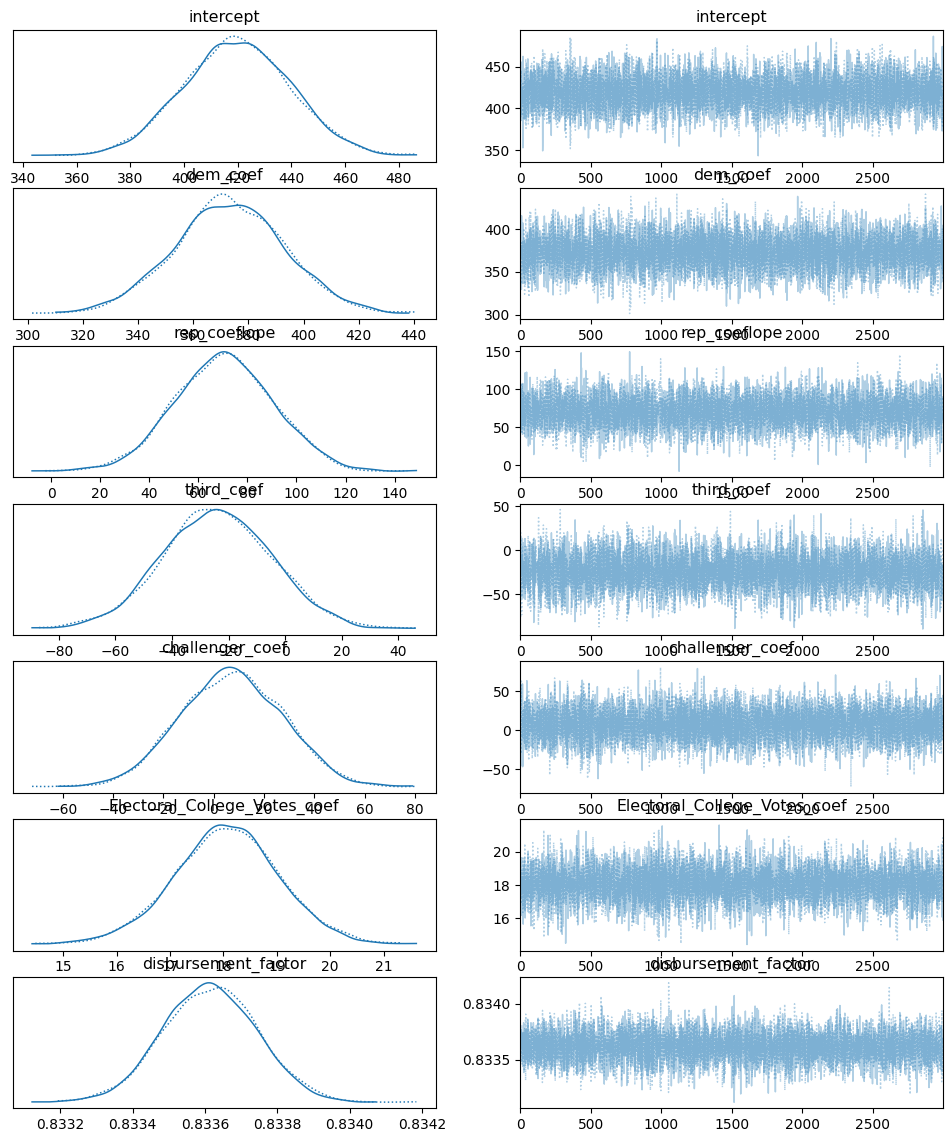

In [ ]:
arviz.plot_trace(idata)

Statistical Summary Table

In [ ]:
gaussian_model_intercept = sm.GLM(
    candidate18_ec['Total_Contribution'],
    sm.add_constant(candidate18_ec[['dem', 'rep', 'third_party', 'challenger', 'Electoral_College_Votes', 'Total_Disbursement']]),
    family=sm.families.Gaussian()
)
gaussian_results = gaussian_model_intercept.fit()
print(gaussian_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     Total_Contribution   No. Observations:                 3793
Model:                            GLM   Df Residuals:                     3787
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                      1.7733e+11
Method:                          IRLS   Log-Likelihood:                -54501.
Date:                Tue, 09 May 2023   Deviance:                   6.7154e+14
Time:                        05:23:06   Pearson chi2:                 6.72e+14
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9946
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    6

In [ ]:
gaussian_results.mu

array([ -28886.5275634 ,  -13259.52973114,  -32626.99291719, ...,
       7361239.21823331,  286222.15712181,  598728.33669463])

In [ ]:
y = candidate18_ec['Total_Contribution']
y_pred = gaussian_results.predict(sm.add_constant(candidate18_ec[['dem', 'rep', 'third_party', 'challenger', 'Electoral_College_Votes', 'Total_Disbursement']]))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_scores(y, y_pred):
  mse = mean_squared_error(y, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y, y_pred)
  r_squared = r2_score(y, y_pred)

  print("Mean squared error:", mse)
  print("Root mean squared error:", rmse)
  print("Mean absolute error:", mae)
  print("R-squared:", r_squared)

In [ ]:
print_scores(y, y_pred)

Mean squared error: 177048005231.89438
Root mean squared error: 420770.7276319188
Mean absolute error: 129190.32322109911
R-squared: 0.8392671939122031


This is the Scatterplot for GLM prediction and original Total Contribution

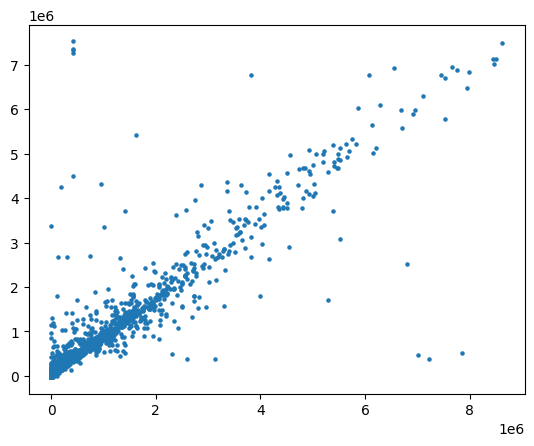

In [ ]:
plt.scatter(candidate18_ec['Total_Contribution'], y_pred, s = 5)

**4. Nonparametric Method**


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_np = candidate18_ec[['dem', 'rep', 'third_party', 'challenger', 'Electoral_College_Votes', 'Total_Disbursement']]
y_np = candidate18_ec['Total_Contribution']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state = 42)

In [ ]:
model = DecisionTreeRegressor(random_state = 42, max_depth = 8)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
print_scores(y_test, y_test_pred)

Mean squared error: 189276336710.31128
Root mean squared error: 435059.00371134863
Mean absolute error: 113344.21455365593
R-squared: 0.8438813225267298


In [ ]:
print_scores(y_train, y_train_pred)

Mean squared error: 33875816233.465538
Root mean squared error: 184053.8405833074
Mean absolute error: 52996.37124318558
R-squared: 0.9684438655307926


Prediction v.s. Truth for test set

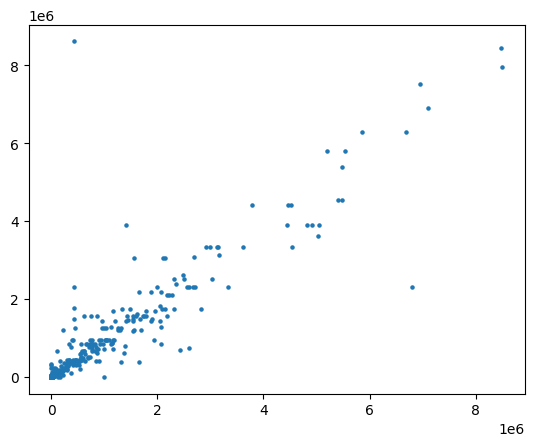

In [ ]:
plt.scatter(y_test, y_test_pred, s = 5)

For training set

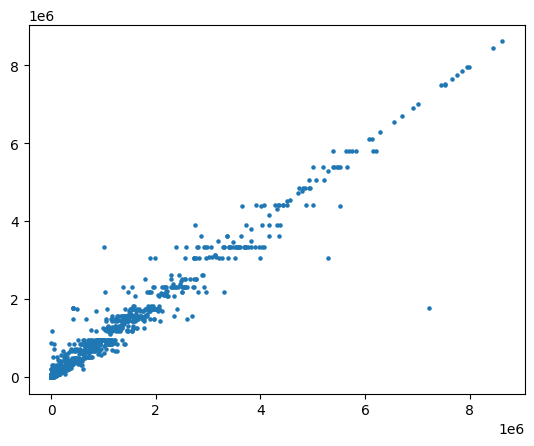

In [ ]:
plt.scatter(y_train, y_train_pred, s = 5)